# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

In [1]:
import numpy as np
from itertools import product
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

In [31]:
set1 = np.array([[-1, 1], [1, 1]])
set2 = np.array([[-1, 1], [0, 0], [1, 1]])

#### Two points

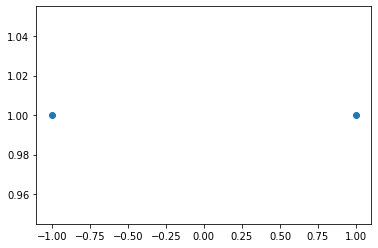

In [33]:
plt.scatter(set1[:,0], set1[:,1])

#### Three points

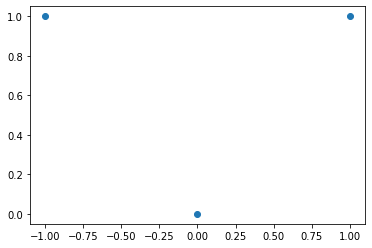

In [34]:
plt.scatter(set2[:,0], set2[:,1])

* three points are not shattered if they're together on one straight line

#### Four points

Four points on $\mathbb{R}^2$ are actually never shattered by $\mathcal{F}_{a,b}$; every example will be valid.

#### VC dimension of $\mathcal{F}_{a,b}$ is 4

### b)

In [17]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(d, n, S_n):
    assert S_n.shape == (n, d)
    
    class_assignments = list(product(*[range(2)]*n))[1:(2**(n-1))]
    for classes in class_assignments:
        y = np.array(classes)
        if len(np.unique(y)) == 1:
            continue
        svc = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        svc.fit(S_n, y)
        if svc.score(S_n, y) < 1:
            return False

    return True

In [19]:
S_n_1 = np.array([[-1, 1], [0, 0], [1, 1]])
S_n_2 = np.array([[-1, -1], [0, 0], [1, 1]])
n = 3
d = 2

In [20]:
is_shattered(d, n, S_n_1)

True

In [21]:
is_shattered(d, n, S_n_2)

False

### c)

In [6]:
def is_shattered_visualize(d, n, S_n):
    assert S_n.shape == (n, d)
    
    plot_number = 2**(n-1)-1
    class_assignments = list(product(*[range(2)]*n))[1:(plot_number+1)]
    fig, ax = plt.subplots(plot_number, 1, figsize=(1, plot_number))
    
    for number, classes in enumerate(class_assignments):
        y = np.array(classes)
        ax[number].scatter(S_n[:,0], S_n[:,1], c=y)
        
        if len(np.unique(y))==1:
            continue
        
        svc = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        svc.fit(S_n, y)
        
        if svc.score(S_n, y) < 1:
            continue
        
        w = svc.coef_[0]
        b = svc.intercept_[0]
        
        if w[1]==0:
            ax[number].axvline(-b/w[0], c='#00c000')
            continue
        
        x_points = np.linspace(S_n[:, 0].min(), S_n[:, 0].max())
        y_points = -(w[0]/w[1])*x_points - b/w[1]
        ax[number].plot(x_points, y_points, c='#00c000')

In [7]:
S_4 = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])

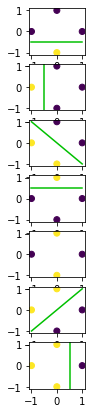

In [8]:
is_shattered_visualize(2, 4, S_4)

### d)

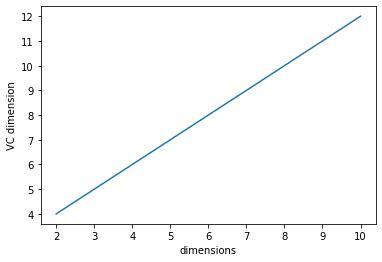

In [30]:
d_grid = list(range(2, 11))
n_grid = list(range(3, 13))
results_n = [13 for d in d_grid]
for index, d in enumerate(d_grid):
    mean = np.zeros(d)
    cov = np.eye(d)
    for n in n_grid:
        broken_loop = False
        for s in range(50):
            S_n = np.random.multivariate_normal(mean, cov, n)
            if is_shattered(d, n, S_n):
                broken_loop = True
                break
        if not broken_loop:
            results_n[index] = n
            break

plt.plot(d_grid, results_n)
plt.xlabel('dimensions')
plt.ylabel('VC dimension')
plt.show()

conclusion: $a, b \in \mathbb{R}^d \Rightarrow VC(\mathcal{F}_{a,b}) = d+1$ (agrees with a fact from the lecture brought up earlier in the notebook)